In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


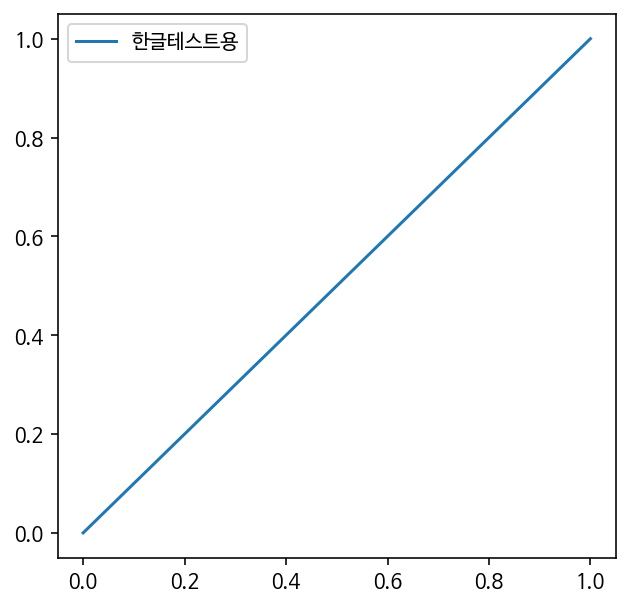

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [ ]:
data=pd.read_csv('데이콘/제주/201901-202003.csv')

In [ ]:
sub = pd.read_csv('데이콘/제주/submission.csv')

In [ ]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


변수명
- REG_YYMM :년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
- AGE: 연령대
- SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
- FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수 (명)
- **AMT : 이용금액 (원) - 종속변수**
- CNT : 이용건수 (건)

In [ ]:
data[data['CNT']==data['CNT'].max()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
12230816,201908,경기,화성시,체인화 편의점,경기,화성시,30s,1,2,32728,924209390,120357


- 행 해석: 19년 8월 한달동안 화성시의 30대 남성들의(영유아자녀가구) 화성시 편의점 고객의 수는 32728명이고 소비 횟수는 120357번이며 총 사용 금액은 924209390원이다.
 - 즉 한명의 고객이 같은 편의점에서 여러번 소비를 했다는 뜻


In [ ]:
#중복된 행의 데이터만 표시하기
check = data[data.columns[:-3]]
display(check[check.duplicated()])

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC


여기서 궁금한 점은 "카드이용 정보가 같은 경우가 있을지" 이다.
- 없음 (모두 다름)
- **결론적으로 각 지역의 업종별로 '어떤 고객(고객 지역,성별,가족 생애주기 등)'들이 구성되어 있는지 확인을 하는 것이 중요해 보인다.**

In [ ]:
data.shape

(24697792, 12)

In [ ]:
data.isna().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [ ]:
data['REG_YYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003])

In [ ]:
sub.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


submission 파일에는 train set에 존재하는 '시,군,구' 와 소비자 정보 변수가 존재하지 않음. 그렇기 때문에 train set에서 지역과 업종에 따른 소비자 정보에 대한 특성을 찾아 변수를 만들어야할 것으로 보인다.

In [ ]:
sub.groupby('CARD_SIDO_NM')['STD_CLSS_NM'].unique()

CARD_SIDO_NM
강원    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경기    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
경북    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
광주    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
대구    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
대전    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
부산    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
서울    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
세종    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
울산    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
인천    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
전남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
전북    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
제주    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
충남    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
충북    [건강보조식품 소매업, 골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물...
Name: STD_CLSS_NM, dtype: object

문제 : 기간 내 지역, 업종 별 월간 총 사용 금액 예측
- 특별시,광역시,도별로 각 업종명에 따라 AMT의 합을 구하는 문제

In [ ]:
# 지역 구성
data['CARD_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [ ]:
# 시,군,구 구성
data['CARD_CCG_NM'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광주시',
       '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구',
       '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시',
       '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양평군',
       '여주시', '연천군', '오산시', '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시',
       '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군',
       '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시', '의령군', '진주시', '창녕군',
       '창원시 마산합포구', '창원시 마산회원구', '창원시 성산구', '창원시 의창구', '창원시 진해구', '통영시',
       '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '군위군',
       '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시',
       '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시 남구',
       '포항시 북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구', '중구',
      

In [ ]:
# 업종 구성
data['STD_CLSS_NM'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

# EDA
EDA 계획
1. value_count를 활용한 지역별 업종 비중 확인
2. 각 업종별로 이용 건수, 고객수 비율이 높은 지역을 뽑자.

## 1. 등장 횟수 EDA (지역별 업종 비중)

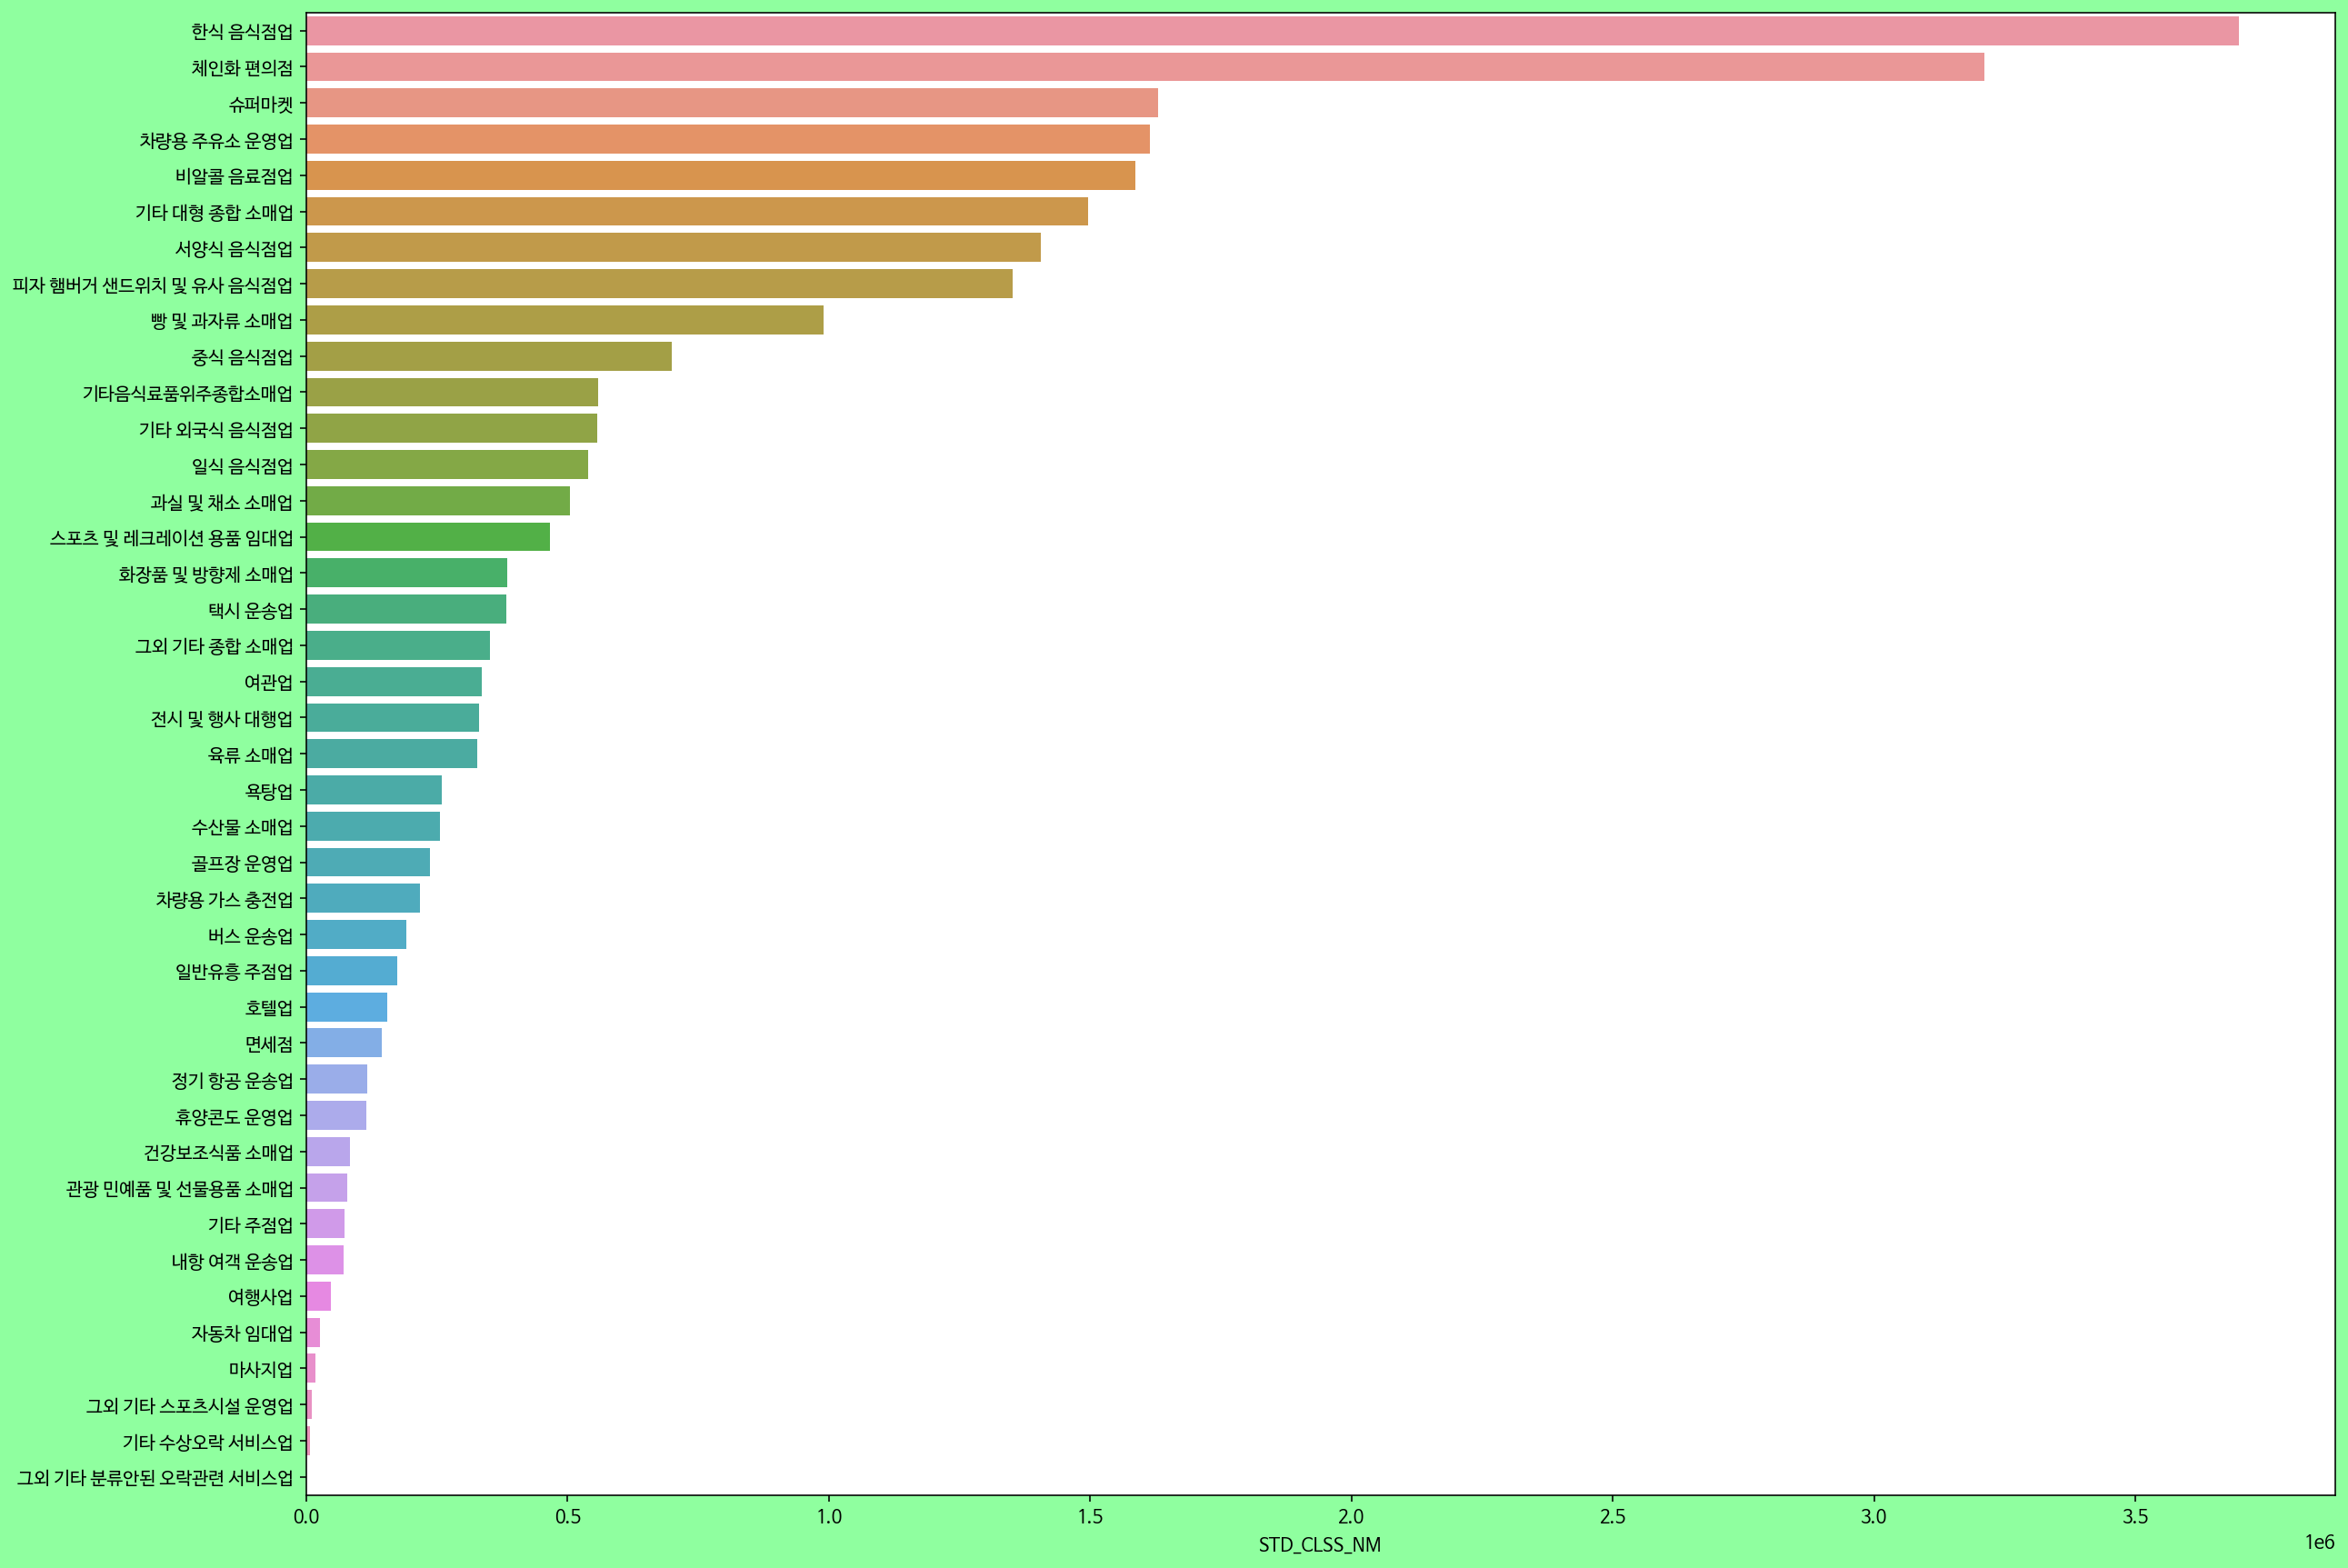

In [ ]:
# 업종별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=data['STD_CLSS_NM'].value_counts().index,x=data['STD_CLSS_NM'].value_counts())
#plt.tight_layout()

등장 횟수 비중에서 한식업이 가장 큰 비중을 차지하고 있음. 다음으로 체인화 편의점이 2위로 독보적으로 두 범주가 높다. 또한, 전반적으로 음식업의 등장량이 많은 것으로 보임

In [ ]:
city_count= data.groupby(['CARD_SIDO_NM','CARD_CCG_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,count
0,강원,강릉시,한식 음식점업,24490
1,강원,강릉시,체인화 편의점,20117
2,강원,강릉시,비알콜 음료점업,13013
3,강원,강릉시,서양식 음식점업,12398
4,강원,강릉시,기타 대형 종합 소매업,10258


In [ ]:
# 사실상 시,군,구 변수는 활용을 할 수 없기때문에 도별로 접근하는 것이 좋을 것으로 보인다.
city_sum = city_count.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,건강보조식품 소매업,1480
1,강원,골프장 운영업,32089
2,강원,과실 및 채소 소매업,27154
3,강원,관광 민예품 및 선물용품 소매업,4428
4,강원,그외 기타 분류안된 오락관련 서비스업,2


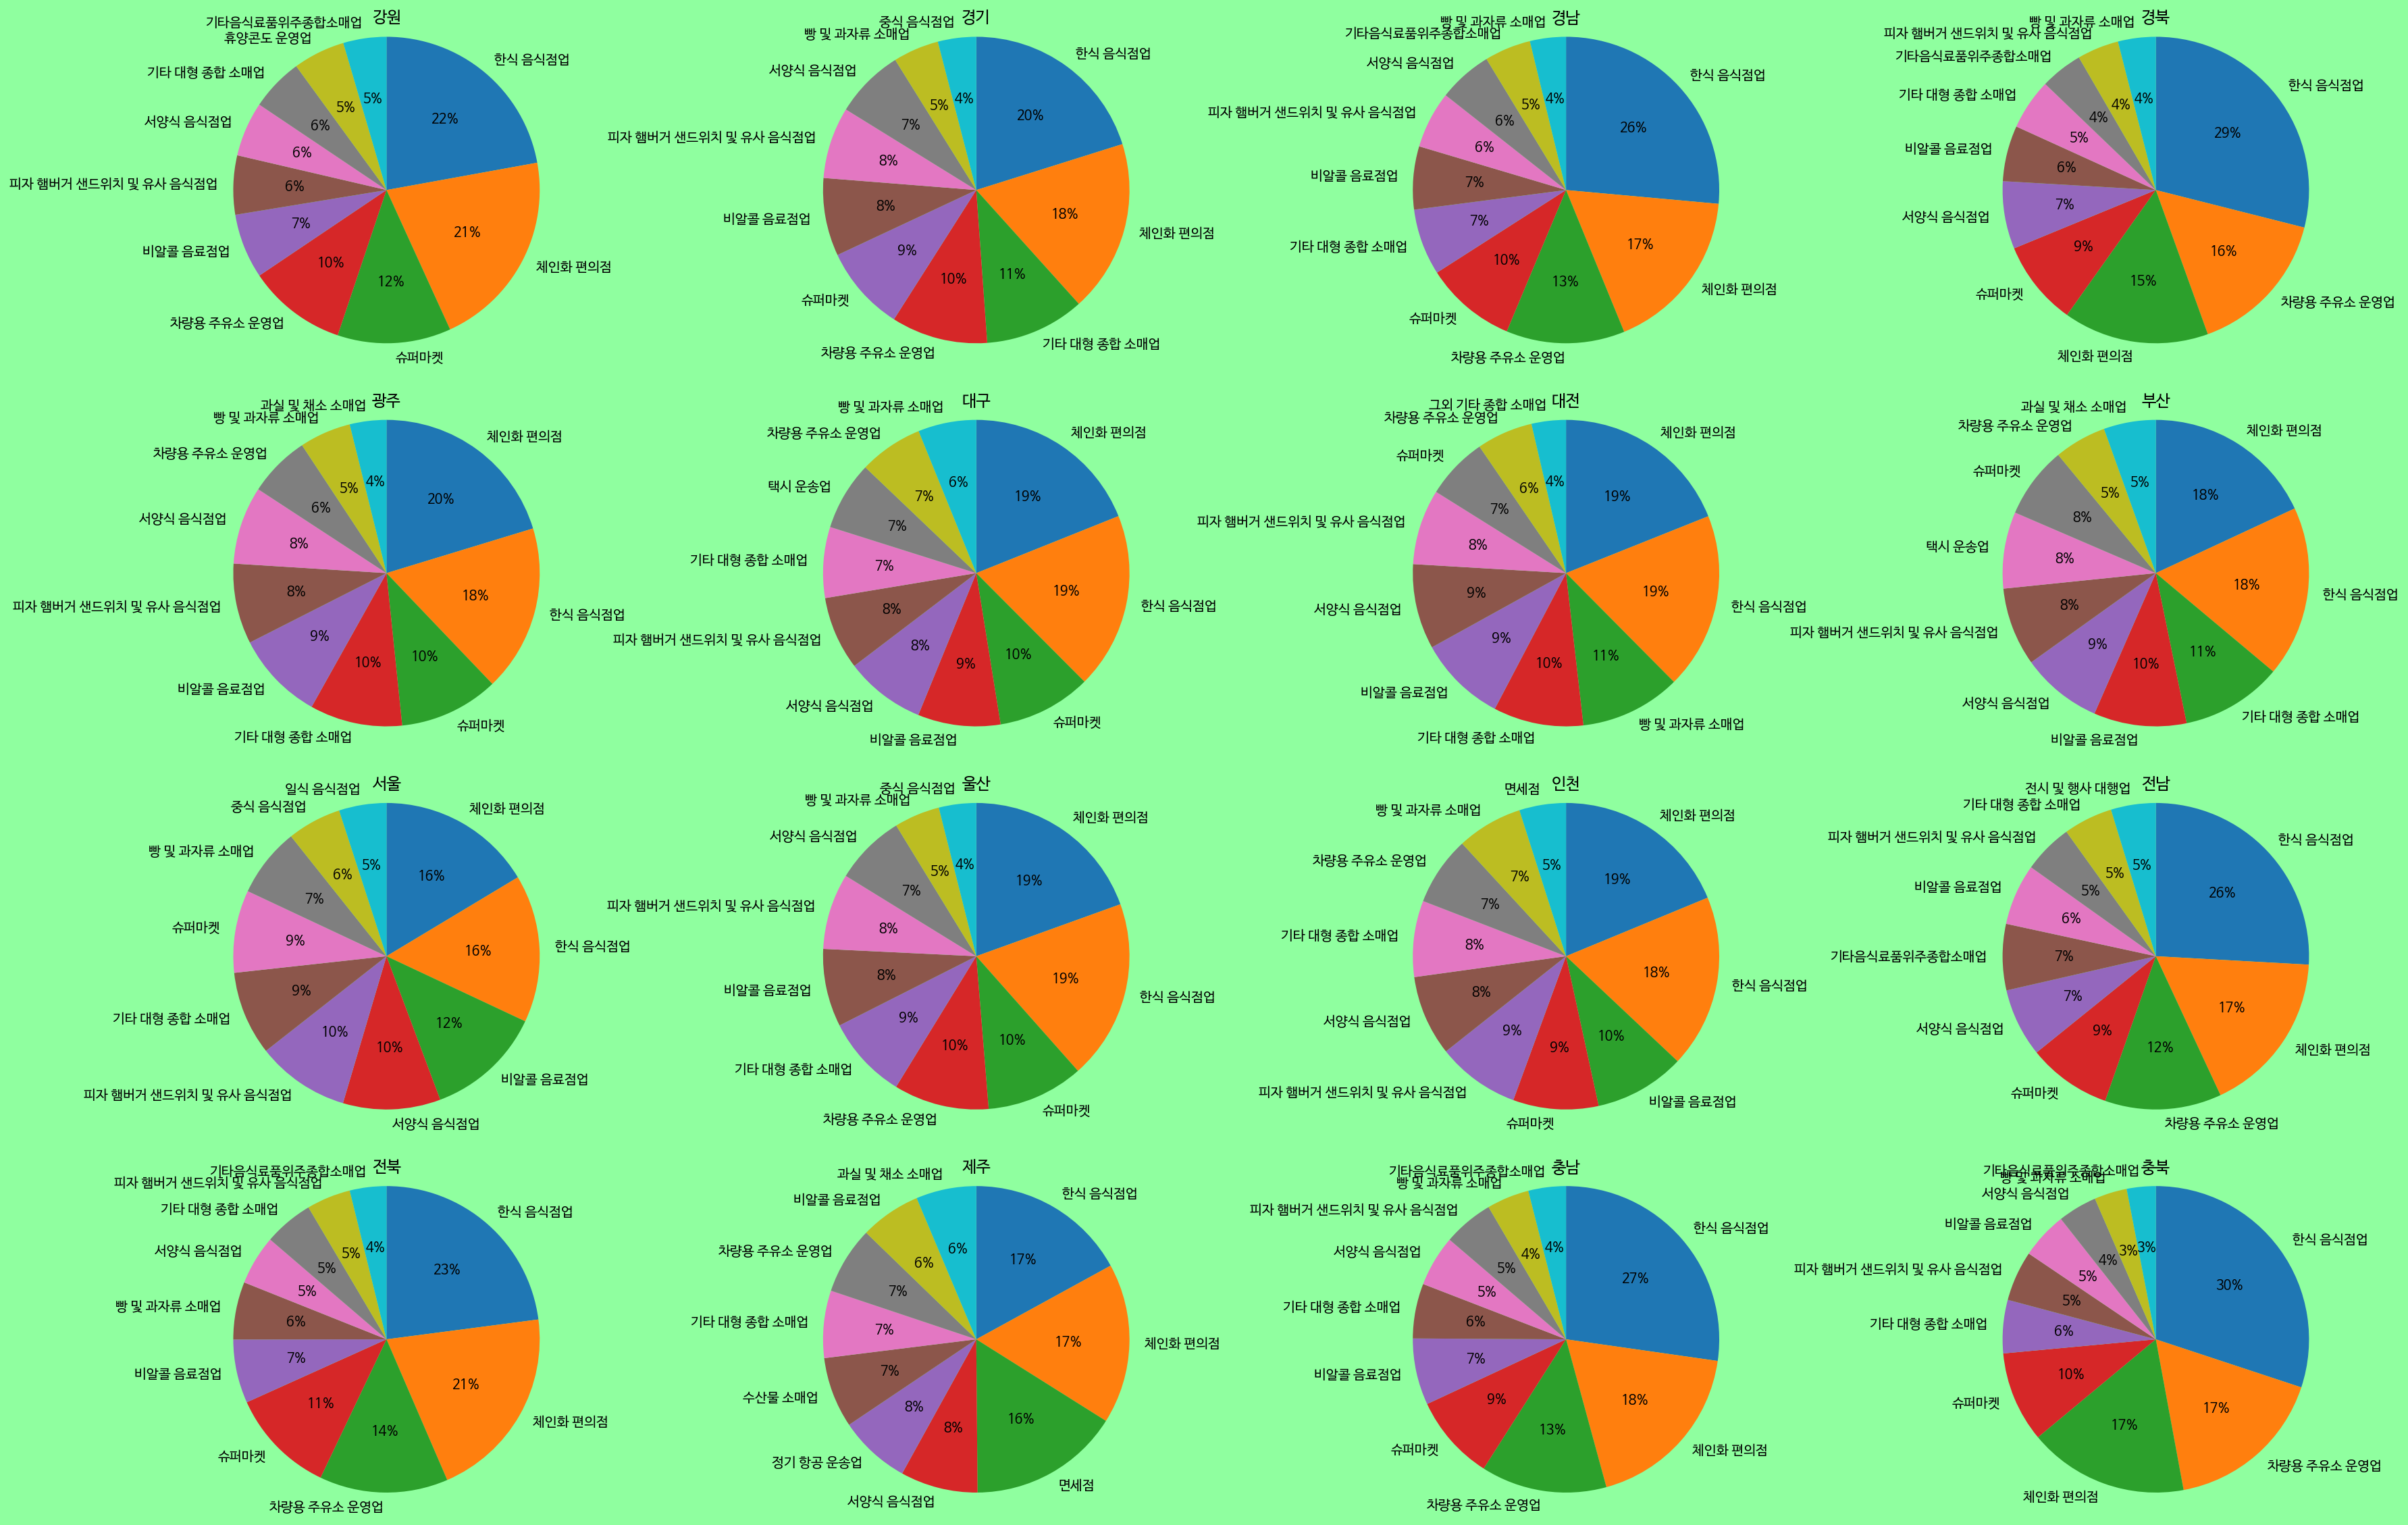

In [ ]:
# 도, 특별시, 광역시에 따른 업종별 소비 등장 횟수

fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

#plt.tight_layout()
plt.show()

지역에 따라 업종마다 소비 등장 횟수 비중이 약간의 차이가 보이는 것 같다.

- TOP3 및 특징
 - 강원: [한식,편의점,슈퍼마켓], 휴양콘도
 - 경기: [한식, 편의점, 기타 대형 종합 소매업]
 - 경남: [한식, 편의점,주유소], 기타음식료품위주종합소매업
 - 경북: [한식, 주유소,편의점]
 - 광주: [편의점, 한식, 슈퍼마켓]
 - 대구: [편의점, 한식, 슈퍼마켓], 택시
 - 대전: [편의점,한식,빵 및 과자류 소매업]
 - 부산: [편의점, 한식, 기타 대형 종합 소매업], 택시
 - 서울: [편의점, 한식, 비알콜 음료점업], 4위: 서양식, 5위: 피자 햄버거 샌드위치
 - 울산: [편의점,한식,슈퍼마켓]
 - 인천: [편의점, 한식, 비알콜 음료점업], 5,6 위 피자 햄버거, 서양식
 - 전남: [한식, 편의점, 주유소], 기타음식료품위주종합소매업, 전시 및 행사 대행업
 - 전북: [한식, 체인화 편의점, 주유소], 기타음식료품위주종합소매업
 - 제주: [한식,편으점,면세점], 3위 면세점 주목
 - 충남: [한식,편의점,주유소], 기타음식료품위주종합소매업
 - 충북: [한식,주유소,편의점], 기타음식료품위주종합소매업

In [ ]:
# SIDO = city_count[city_count['CARD_SIDO_NM']=='충북']

# fig,axs = plt.subplots(4, 4)
# fig.set_size_inches(40,30)
# fig.patch.set_facecolor('xkcd:mint green')

# for idx,city in enumerate(SIDO['CARD_CCG_NM'].unique()):
#   if idx <=3:
#     sns.barplot(y=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['STD_CLSS_NM'],
#                 x=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['count'],ax = axs[0][idx])
#     axs[0, idx].title.set_text(city)
#   if idx > 3 and idx <=7:
#     sns.barplot(y=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['STD_CLSS_NM'],
#                 x=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['count'],ax = axs[1][idx-4])
#     axs[1, idx-4].title.set_text(city)
#   if idx > 7 and idx <= 11:
#     sns.barplot(y=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['STD_CLSS_NM'],
#                 x=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['count'],ax = axs[2][idx-8])
#     axs[2, idx-8].title.set_text(city)
#   if idx > 11 and idx <=15:
#     sns.barplot(y=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['STD_CLSS_NM'],
#                 x=SIDO[SIDO['CARD_CCG_NM']==city].sort_values('count',ascending=False).head(10)['count'],ax = axs[3][idx-12])
#     axs[3, idx-12].title.set_text(city)

# #plt.tight_layout()
# plt.show()

'''경기도 같은 경우 42개의 도시가 잡힌다. 그러므로 시,군,구 별로 한꺼번에 그래프로 비교하기 힘들 것으로 보임.'''

'경기도 같은 경우 42개의 도시가 잡힌다. 그러므로 시,군,구 별로 한꺼번에 그래프로 비교하기 힘들 것으로 보임.'

## 2. 이용 건수, 고객수 비율

### 업종별 이용 건수 

In [ ]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [ ]:
stuff = data.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff.head()

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,1097627,921682
1,골프장 운영업,4951383,3649887
2,과실 및 채소 소매업,24497628,15953201
3,관광 민예품 및 선물용품 소매업,593750,482667
4,그외 기타 분류안된 오락관련 서비스업,1410,1258


In [ ]:
def make_bar(data,col):
  fig = plt.figure(figsize=(14, 7))
  fig.patch.set_facecolor('xkcd:mint green')
  sns.barplot(x=col,y='STD_CLSS_NM',data=data.sort_values(col,ascending=False))
  plt.title(col)
  plt.show()

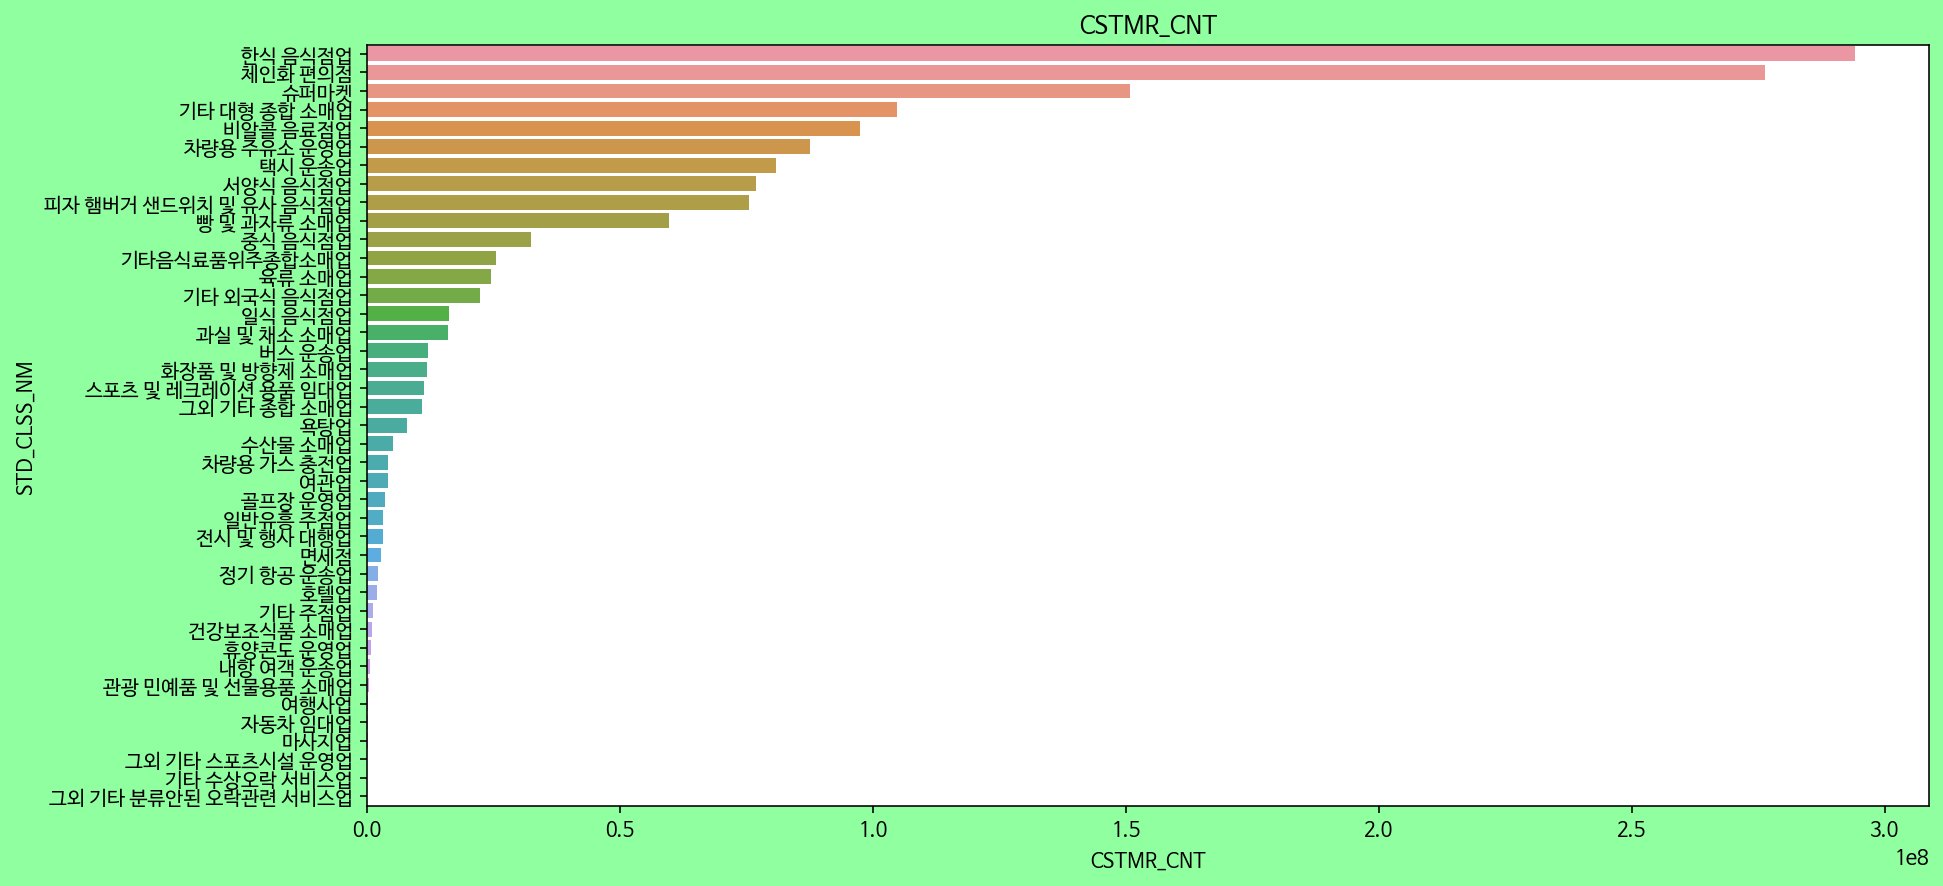

In [ ]:
# 이용고객수
make_bar(stuff,'CSTMR_CNT')

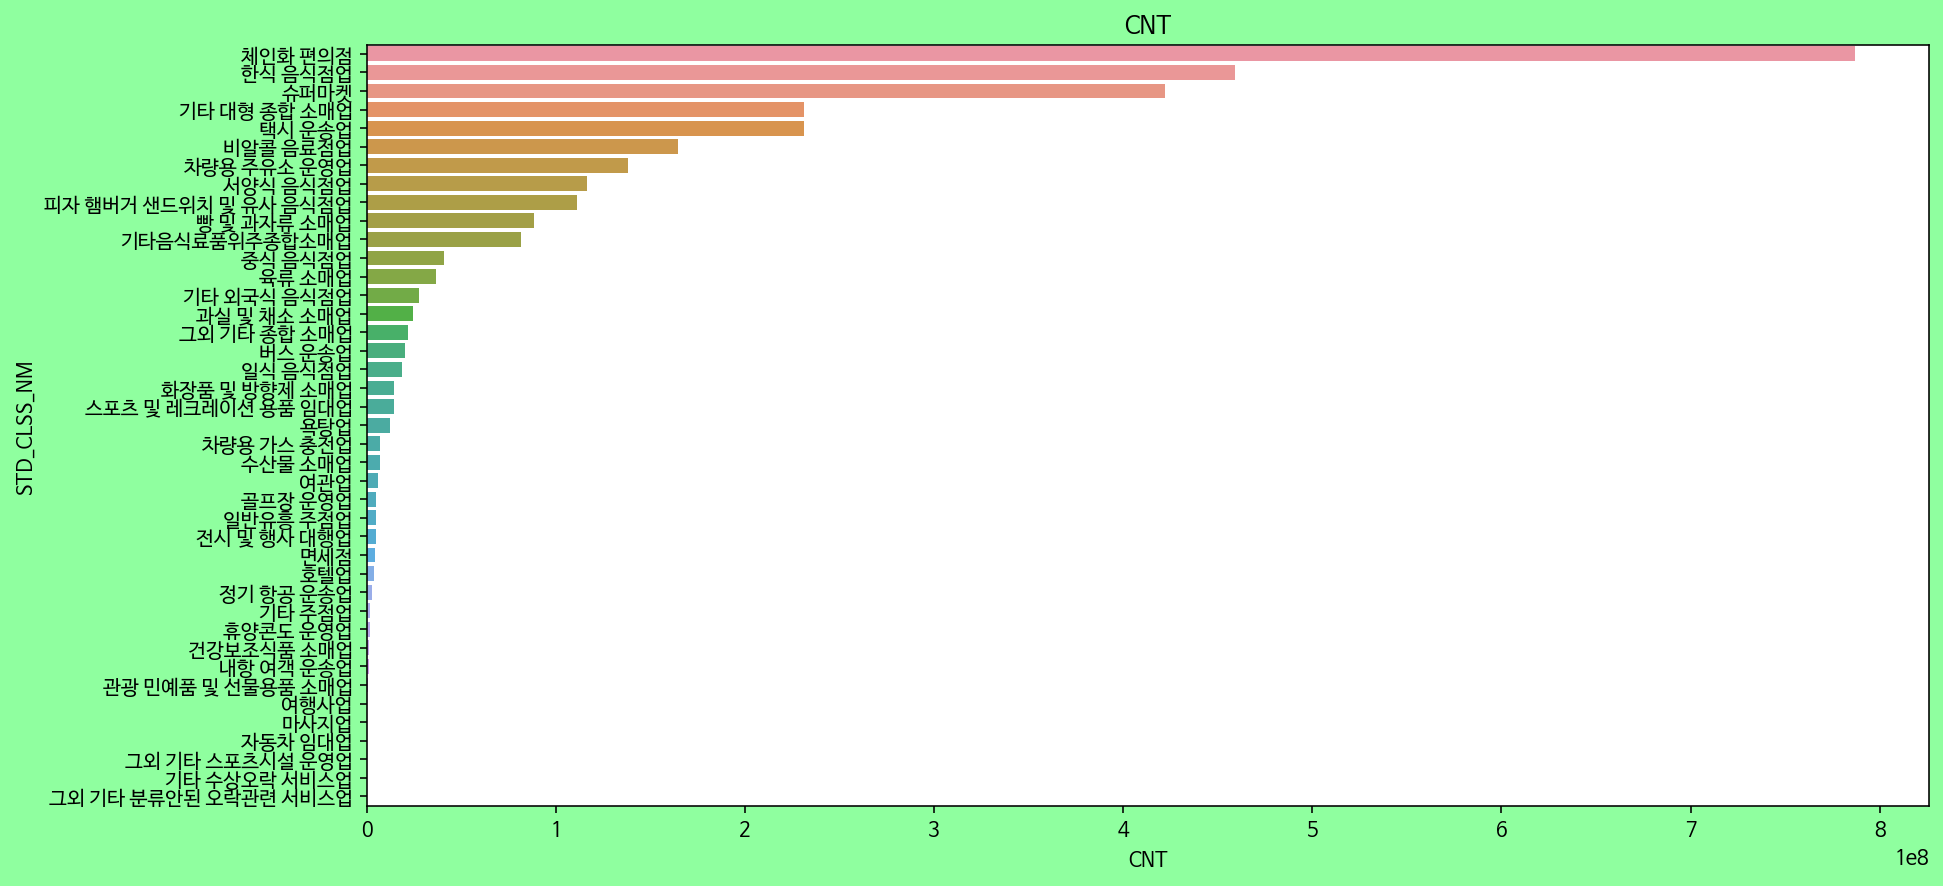

In [ ]:
# 이용 횟수
make_bar(stuff,'CNT')

1,2 위를 주목해볼 필요가 있는 것으로 보인다. 이용 고객수와 이용 횟수의 순위의 1,2위가 바뀐다.
- 이용고객수에 비해 이용건수의 크기가 작은 경우 -> 카드 취소가 많은 업종
- 이용고객수에 비해 이용건수가 큰 경우 -> 같은 고객이 많이 오는 업종

In [ ]:
data['gap']= data['CNT'] - data['CSTMR_CNT']

In [ ]:
data[data['gap'] == -236]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap
22840723,202002,서울,강서구,정기 항공 운송업,제주,제주시,40s,2,3,643,9643960,407,-236


20년 2월의 항공업같은 경우, 40대 여성(가구생애주기 =3)의 카도 취소량이 236건이나 된다.
- gap < 0 : 카드 취소 O
- gap > 0 : 같은 이용고객들 O

In [ ]:
data.loc[data['gap'] <0,'mark'] = '취소있음'
data.loc[data['gap'] ==0,'mark'] = '고객다름'
data.loc[data['gap'] >0,'mark'] = '단골있음'

In [ ]:
gap=data.groupby('STD_CLSS_NM')['mark'].value_counts().reset_index(name='count')
gap.head()

,STD_CLSS_NM,mark,count
0,건강보조식품 소매업,단골있음,43803
1,건강보조식품 소매업,고객다름,37272
2,건강보조식품 소매업,취소있음,2782
3,골프장 운영업,단골있음,164503
4,골프장 운영업,고객다름,71807


In [ ]:
df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['mark']=='취소있음'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'cancel_count'},inplace=True)
df['rate'] = df['cancel_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head()

,STD_CLSS_NM,total,cancel_count,rate
0,정기 항공 운송업,115914,38014,0.327950
1,여행사업,47446,5537,0.116701
2,건강보조식품 소매업,83857,2782,0.033176
3,내항 여객 운송업,72294,1857,0.025687
4,스포츠 및 레크레이션 용품 임대업,466533,9912,0.021246


항공 운송업과 여행사업이 카드취소 고객의 존재가 독보적으로 높다.

---

위와 같은 방식으로 월별, 지역별로 CNT, CSTMR_CNT를 확인해 볼 수도 있을 것으로 보인다.

또한 매월 업종별, 각 지역에 따른 업종별 -> CNT, CSTMR_CNT를 확인해봐도 괜찮을 것으로 보임.
- 결과적으로 CNT와 CSTMR_CNT를 활용해 AMT를 예측할 수 있는 방법을 도출하는 것이 좋을 것 같음.